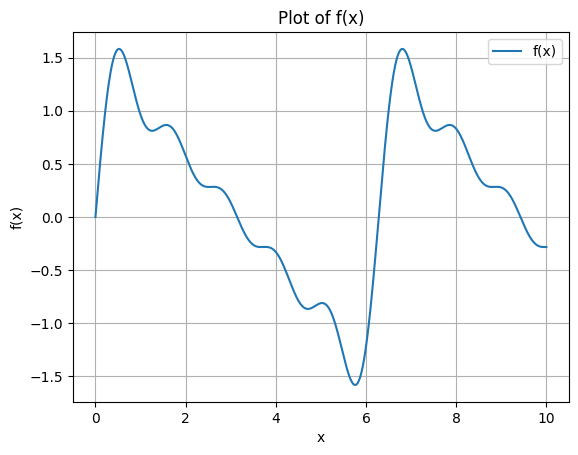

In [29]:
# NAMA: Adrian Veda Darmawan
# NPM : 24083010090

import numpy as np
import matplotlib.pyplot as plt

# interval
x_graph = np.linspace(0, 10, 750)

# deret fungsi sinusoidal
def f(x):
  return np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

f_values = f(x_graph) # Calculate the function values

# Hitung integral dan diferensial dari fungsi ‘f’ untuk interval x      50% nilai
# hitung secara terpisah bagian integral di atas dan di bawah y=0               25% nilai
# plot semua fungsi: f, f’, F (atas dan bawah dengan area warna berbeda)        25% nilai
# metode bebas, be creative!
plt.plot(x_graph, f_values, label='f(x)') # Use f_values for plotting
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
def trapezArea(a, b, h):
  return (a+b)*h/2

def calculateArea(x_values, y_values):
  plusarea = 0
  minusarea = 0
  n = len(x_values)
  if n < 2:
      return (0, 0, 0) # Not enough points to form a trapezoid

  for i in range(n - 1):
    x1, x2 = x_values[i], x_values[i+1]
    y1, y2 = y_values[i], y_values[i+1]
    h = x2 - x1 # Step size

    # If both points are positive or zero, add to plusarea
    if y1 >= 0 and y2 >= 0:
      plusarea += trapezArea(y1, y2, h)
    # If both points are negative or zero, add to minusarea
    elif y1 <= 0 and y2 <= 0:
      minusarea += trapezArea(y1, y2, h)
    # If there is a zero crossing
    else:
      # Find the x-intercept using linear interpolation
      # Equation of the line: y - y1 = m(x - x1), where m = (y2 - y1) / h
      # When y = 0, -y1 = m(x - x1)
      # x - x1 = -y1 / m = -y1 * h / (y2 - y1)
      # x_intercept = x1 - y1 * h / (y2 - y1)
      if (y2 - y1) != 0: # Avoid division by zero if the function is momentarily flat
          x_intercept = x1 - y1 * h / (y2 - y1)

          if y1 > 0 and y2 < 0: # Crossing from positive to negative
              plusarea += trapezArea(y1, 0, x_intercept - x1)
              minusarea += trapezArea(0, y2, x2 - x_intercept)
          elif y1 < 0 and y2 > 0: # Crossing from negative to positive
              minusarea += trapezArea(y1, 0, x_intercept - x1)
              plusarea += trapezArea(0, y2, x2 - x_intercept)
          # If y1 or y2 is exactly zero, the area is added to the appropriate part in the >=0 or <=0 checks above.

  total_area = plusarea + minusarea
  return (total_area, plusarea, minusarea)

# Use the pre-calculated x_graph and f_values from the first cell
integral_result = calculateArea(x_graph, f_values)
print(f"Total Area: {integral_result[0]}")
print(f"Positive Area: {integral_result[1]}")
print(f"Negative Area: {integral_result[2]}")

Total Area: 2.186534104971691
Positive Area: 4.604266200847662
Negative Area: -2.417732095875971


In [31]:
# Calculate the derivative of f(x) using the central difference method
# f'(x) ≈ (f(x + h) - f(x - h)) / (2h)
# We'll use the step size from x_graph
h = x_graph[1] - x_graph[0]

# To avoid issues at the boundaries, we'll use forward/backward difference for the first/last point
derivative_f_values = np.zeros_like(x_graph)

# Forward difference for the first point
derivative_f_values[0] = (f(x_graph[0] + h) - f(x_graph[0])) / h

# Central difference for the interior points
for i in range(1, len(x_graph) - 1):
  derivative_f_values[i] = (f(x_graph[i] + h) - f(x_graph[i] - h)) / (2 * h)

# Backward difference for the last point
derivative_f_values[-1] = (f(x_graph[-1]) - f(x_graph[-1] - h)) / h

# Alternatively, a more vectorized approach using numpy.gradient
# derivative_f_values = np.gradient(f_values, x_graph)

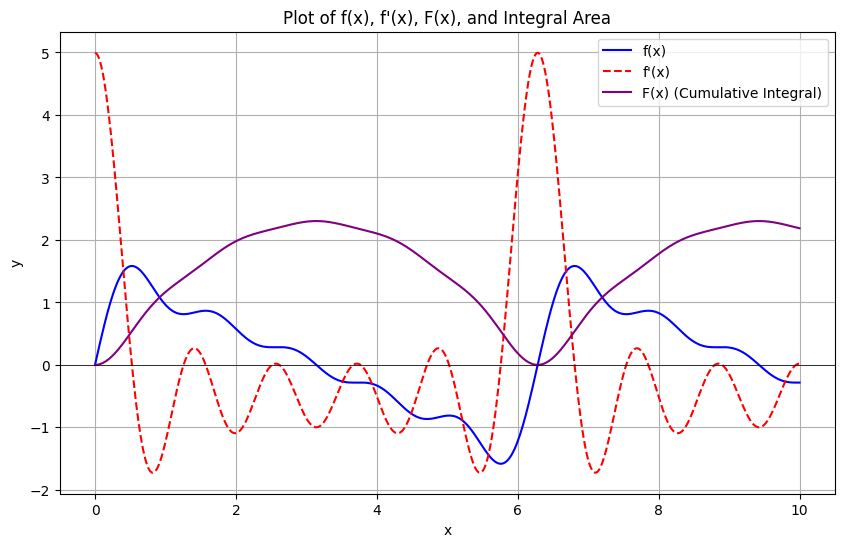

In [28]:
cumulative_integral = np.cumsum((f_values[:-1] + f_values[1:]) / 2 * (x_graph[1:] - x_graph[:-1]))
cumulative_integral = np.insert(cumulative_integral, 0, 0)


plt.figure(figsize=(10, 6))

# Plot the original function
plt.plot(x_graph, f_values, label='f(x)', color='blue')

if 'derivative_f_values' in locals():
    plt.plot(x_graph, derivative_f_values, label="f'(x)", color='red', linestyle='--')
else:
    print("Derivative values not found. Please run the cell that calculates the derivative.")

plt.plot(x_graph, cumulative_integral, label='F(x) (Cumulative Integral)', color='purple')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x), f\'(x), F(x), and Integral Area')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()